# What factors increase one's survival likelihood in the Titanic

In [7]:
# Import libraries
import sklearn 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Download data

In [8]:
import os
data_dir = '/Users/kenlam/Desktop/Data science/ML projects/project 6/titanic_pred/titanic/train.csv'
train_df = pd.read_csv(data_dir)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now that we have our data loaded in, let's explore each feature

## Data exploration

### Survived

In [9]:
df = train_df.copy()
aggregated_df = df.groupby(['Survived'])['PassengerId'].count()

Out of a total of 891 passengers, 549 did not survived while 342 survived.

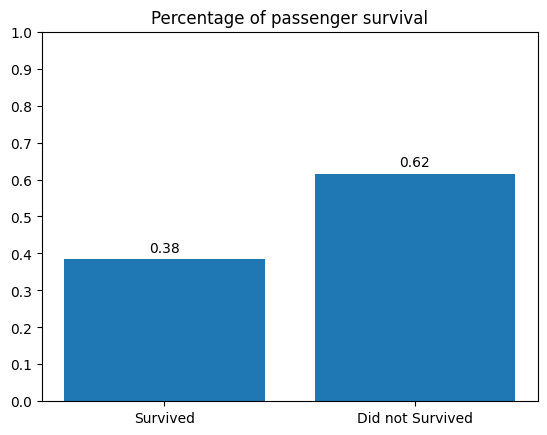

In [10]:
total_passengers = aggregated_df[0] + aggregated_df[1]
x = ['Survived', 'Did not Survived']
y = [aggregated_df[1]/ total_passengers, aggregated_df[0]/total_passengers]

bars = plt.bar(x, y)
plt.title("Percentage of passenger survival")
plt.yticks(np.arange(0.0, 1.1, 0.1))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()
plt.show()

In our bar chart, 38% of the passengers survived while 62% did not survived.

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
groupby_gender = df.groupby('Survived')['Sex'].value_counts()

In [13]:
groupby_gender.head()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [14]:
not_survived = groupby_gender[0]
survived = groupby_gender[1]

In [15]:
percentage_not_survived = (not_survived / not_survived.sum())
percentage_survived = (survived / survived.sum())

In [16]:
print("Those who did not survived")
print(percentage_not_survived)

print("Those who did survive")
print(percentage_survived)

Those who did not survived
Sex
male      0.852459
female    0.147541
Name: count, dtype: float64
Those who did survive
Sex
female    0.681287
male      0.318713
Name: count, dtype: float64


Of those who survived, 68% were females and 32% were males.
Of those who did not survived, 85% were males and 15% were males.
This makes sense because in emergency situations, females were more likely than males to be evacuated and prioritized first.

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's see the percentages of the ticket class amongst those who survived and did not survived

In [19]:
survived = df[df['Survived'] == 1]
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
survived.groupby('Pclass')["Survived"].count()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

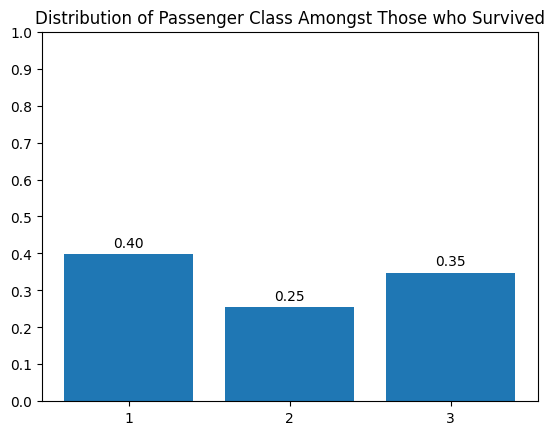

In [48]:
total_survived = survived['PassengerId'].count()
x = sorted((list(survived["Pclass"].unique()))) # store the names of the pclass
for i in range(len(x)):
    x[i] = str(x[i]) # convert to string names

y = list(survived.groupby('Pclass')["Survived"].count()) / total_survived # store the count for each class

bars = plt.bar(x, y)
plt.title("Distribution of Passenger Class Amongst Those who Survived")
plt.yticks(np.arange(0,1.1,0.1))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

For those who have survived, 40% were a passenger class 1, 25% were in passenger class 2, and 35% were in passenger class 3.

In [20]:
not_survived = df[df['Survived'] == 0]
not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [52]:
not_survived.groupby('Pclass')["Survived"].count()

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

[0.14571949 0.17668488 0.67759563]


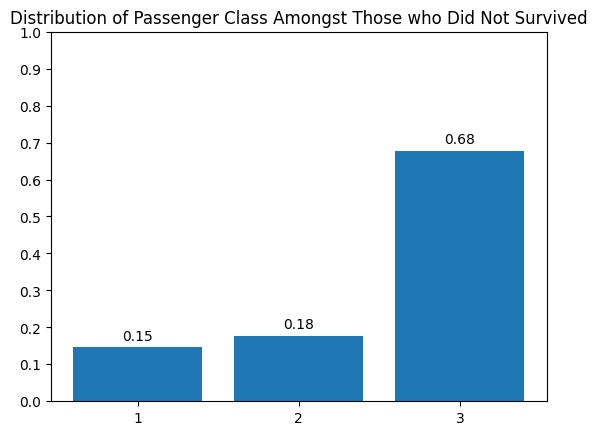

In [53]:
total_survived = not_survived['PassengerId'].count()
x = sorted((list(not_survived["Pclass"].unique()))) # store the names of the pclass
for i in range(len(x)):
    x[i] = str(x[i]) # convert to string names

y = list(not_survived.groupby('Pclass')["Survived"].count()) / total_survived # store the count for each class
print(y)

bars = plt.bar(x, y)
plt.title("Distribution of Passenger Class Amongst Those who Did Not Survived")
plt.yticks(np.arange(0,1.1,0.1))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

Amongst those who survived, 15% were in class 1, 18% in class 2, and 68% (the majority) is in class 3.

Comparing between those who survived and did not survived, we can see that most of those who survived were in class 1 while those in the lower classes, specifically class 3, did not survive. To support this conclusion, let's do a Chi-square test to determine if one's whether one survive the Titanic depends on one's passenger class.

In [61]:
pclass_versus_survive_df = df.copy()
pclass_versus_survive_df = pclass_versus_survive_df[['Survived', 'Pclass']]
pclass_versus_survive_df.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [63]:
# Create a crosstab
pclass_versus_survive_cross_tab = pd.crosstab(pclass_versus_survive_df['Survived'], pclass_versus_survive_df['Pclass'])
pclass_versus_survive_cross_tab

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [66]:
# Perform the Chi-Square Independence Test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pclass_versus_survive_cross_tab)

# Print results
print(f"The p value is {p}")

The p value is 4.549251711298793e-23


Because the p value is less than 0.05, we can conclude that we found convincing evidence to support that whether or not one survive the Titanic depends on one's passenger class.

With the power of the chi-square test, let's find if there are significance in other ƒeatures that could impact one's survivability.

In [67]:
# Create a function that returns the p value from the chi-square test

def chi_square_test(col1, col2):
    cross_tab = pd.crosstab(col1, col2) # transform df into cross_tab

    chi2, p, dof, expected = chi2_contingency(cross_tab)

    if (p < 0.05):
        return p
    else:
        return "Not significant"

In [69]:
# Create a list containing the remaining columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
cols = list(df.columns)
cols = cols[3:8] + cols[9:10]
print(cols)

['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [106]:
p_value_list = []
for col in cols:
    p_value = chi_square_test(df['Survived'], df[col])
    if (p_value != "Not significant"):
        p_value_list.append((p_value, col))

print(p_value_list)

[(1.1973570627755645e-58, 'Sex'), (1.5585810465902116e-06, 'SibSp'), (9.703526421039997e-05, 'Parch'), (1.1647635739939964e-11, 'Fare')]


Based on our chi-square independence test, we found significant evidence that sex, # of siblings/spouses, # of parents/children, and passenger's fare price are factors that one's survivability depends on.

Let's visualize this with a correlational matrix

In [118]:
cols.append("Survived")
cols = cols[1:]

TypeError: can only concatenate str (not "list") to str

In [108]:
df1 = df.copy()
df1 = df1[cols]
df1.head()

,Sex,Age,SibSp,Parch,Fare,Survived
0,male,22.0,1,0,7.2500,0
1,female,38.0,1,0,71.2833,1
2,female,26.0,0,0,7.9250,1
3,female,35.0,1,0,53.1000,1
4,male,35.0,0,0,8.0500,0


In [112]:
df1['Sex'] = df1['Sex'].apply(lambda x: 0 if x == "male" else 1)

In [115]:
corr_matrix = df1.corr()
corr_matrix

,Sex,Age,SibSp,Parch,Fare,Survived
Sex,1.000000,-0.093254,0.114631,0.245489,0.182333,0.543351
Age,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


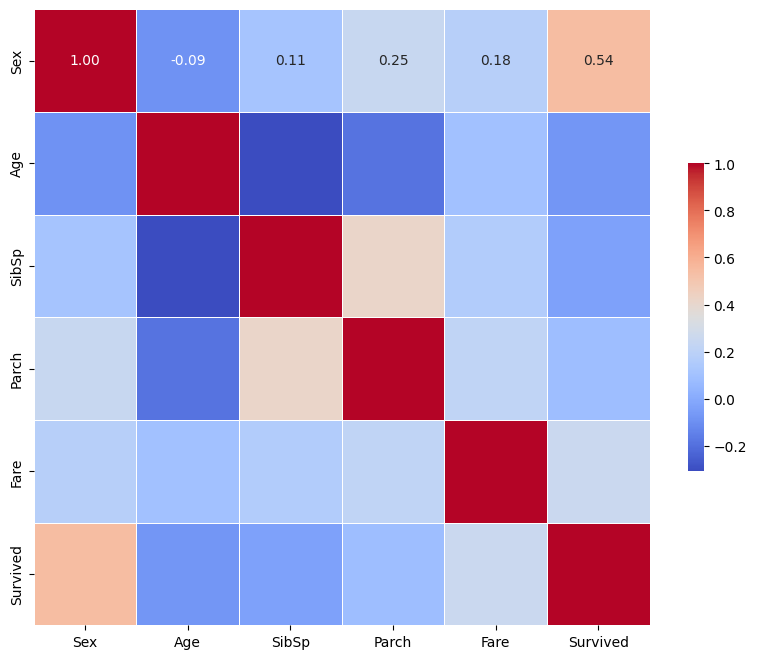

In [120]:
# Graph a heatmap using sns
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

It's interesting to see that from our correlational matrix, we noticed that compared to survived, sex only has the highest correlation out of all other factors. This suggests that a correlation coefficient of 0.54 indicates a moderate strength in the association between one's sex and survivability.